In [8]:
import numpy as np
from matplotlib.pylab import plt
from math import exp
import numpy as np
import pandas as pd

    
def solve():
    
    def f(x, y, z):
        return z
    
    def g(x, y, z):
        return 2 * z - y

    a = 2
    b = 4

    h = 0.2
    i = 0

    x = [2]
    z = [-2]
    y = [1]

    def K_0(i):
        return h * f(x[i], y[i], z[i])

    def L_0(i):
        return h * g(x[i], y[i], z[i])

    def K_1(i):
        return h * f(x[i] + h/2, y[i] + K_0(i)/2, z[i] + L_0(i)/2)

    def L_1(i):
        return h * g(x[i] + h/2, y[i] + K_0(i)/2, z[i] + L_0(i)/2)

    def K_2(i):
        return h * f(x[i] + h/2, y[i] + K_1(i)/2, z[i] + L_1(i)/2)

    def L_2(i):
        return h * g(x[i] + h/2, y[i] + K_1(i)/2, z[i] + L_1(i)/2)

    def K_3(i):
        return h * f(x[i] + h, y[i] + K_2(i), z[i] + L_2(i))

    def L_3(i):
        return h * g(x[i] + h, y[i] + K_2(i), z[i] + L_2(i))

    def step(i):
        x.append(x[i] + h)
        y.append(y[i] + 1/6 * (K_0(i) + 2 * K_1(i) + 2 * K_2(i) + K_3(i)))
        z.append(z[i] + 1/6 * (L_0(i) + 2 * L_1(i) + 2 * L_2(i) + L_3(i)))
    
    while (x[-1] < b):
        step(i)
        i += 1
    
    
    return x, y, z

x, y, z = solve()

df = pd.DataFrame.from_dict({ 'x': x, 'y': y, 'z': z })

df

,x,y,z
0,2.0,1.000000,-2.000000
1,2.2,0.488600,-3.175600
2,2.4,-0.298266,-4.773720
3,2.6,-1.457506,-6.923826
4,2.8,-3.115438,-9.792000
5,3.0,-5.436057,-13.590811
6,3.2,-8.631535,-18.591750
7,3.4,-12.975505,-25.140913
8,3.6,-18.819886,-33.678714
9,3.8,-26.616125,-44.764698


## Built-in solution

In [9]:
from scipy.integrate import odeint

def func(y, z):
    return 2 * z - y

def model(y, t):
    u, v = y
    return [ v, func(u, v) ]

z2 = odeint(model, [1, -2], x)
z2

array([[  1.        ,  -2.        ],
       [  0.48856109,  -3.1756472 ],
       [ -0.29836498,  -4.77383909],
       [ -1.45769511,  -6.92405153],
       [ -3.1157574 ,  -9.79238021],
       [ -5.4365638 , -13.59140932],
       [ -8.63230417, -18.59265498],
       [-12.97664012, -25.14224007],
       [-18.82152352, -33.68062086],
       [-26.61844931, -44.76739179],
       [-36.94528104, -59.11244944]])

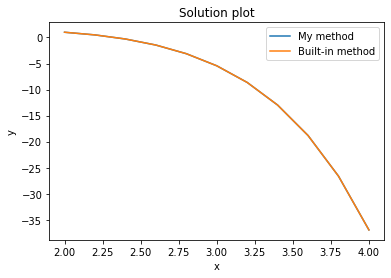

In [3]:
plt.title('Solution plot')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='My method')
plt.plot(x, z2.T[0], label='Built-in method')
plt.legend(loc='best')
plt.show()

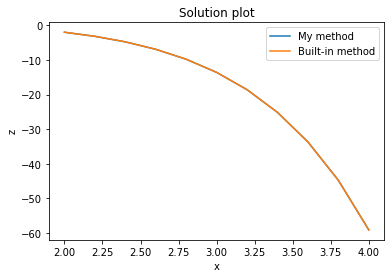

In [10]:
plt.title('Solution plot')
plt.xlabel('x')
plt.ylabel('z')
plt.plot(x, z, label='My method')
plt.plot(x, z2.T[1], label='Built-in method')
plt.legend(loc='best')
plt.show()

In [4]:
print('eps = {}'.format(sum(np.power(z2.T[0] - y, 2)) / len(x)))

eps = 1.9059319089358689e-06
